# Titanic Exercise
### **Author**: Gustavo Mello
- **LinkedIn**: [Gustavo Mello](https://www.linkedin.com/in/gustavo-mello-443a201b9/)
- **GitHub**: [GitHub](https://github.com/)
- **Contact e-mail**: mellogustavo.contato@gmail.com

### Dataset: [Titanic Competition](https://www.kaggle.com/competitions/titanic)


## 1. Initializing Dataset

### Importing Necessary Libraries


In [4]:
import pandas as pd

### Loading Training Titanic Dataset as Dataframe

In [6]:
unmodified_df = pd.read_csv('train.csv')
df = pd.read_csv('train.csv')

### Visualizing part of the Dataframe

In [8]:
# Previewing examples of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Summary of the Dataframe

In [10]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

### Listing all dataset columns

In [12]:
# Check columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 2. Treat Training Data
### What will be done here is:
- **Drop the 'Survived' Column**: The survived column can not be used for training.
- **Drop the PassengerID Column**: This column is not relevant for the problem.
- **Check and treat NaN Values**: NaN values will be treated according to the number of missing values.
- **Check for outliers**: It is possible that there are values that do not represent reality given the context.
- **Treatment of the Column 'Name'**: Full names are irrelevant, but titles, such as Mr., Miss. and Mrs can be, so they will be extracted before dropping the 'Name' column. To know what titles were relevant, other sources were used.
- **Binning Age Values**: Small age gaps are not important, so it would be better to use binning and create categories such as young, adult, and others.
- **Normalization of the data**: The values inside each column should be categorical or numerical data.

### Dropping 'Survived' Column

In [15]:
# Drop the 'Survived' column from the original DataFrame
# We will drop it at the "4. Visualizing Correlation Between Features", because we need this column to plot the pair plots

### Dropping 'PassengerId' Column

In [17]:
# Drop the 'Survived' column from the original DataFrame
df.drop('PassengerId', axis=1, inplace=True)

# Verify the column is dropped
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Treating NaN Values

#### **'Cabin' Column: 687 NaN**

In [20]:
print(f"Number of NaN values in the 'Cabin' column: {df['Cabin'].isnull().sum()}")

Number of NaN values in the 'Cabin' column: 687


**There are so many NaN values that is not worth to use median or any other way of filling the missing information, therefore, the column has to be dropped.**

In [22]:
# Drop the 'Survived' column from the original DataFrame
df.drop('Cabin', axis=1, inplace=True)

# Verify the column is dropped
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### 'Pclass' Column: 0 NaN

In [24]:
print(f"Number of NaN values in the 'Pclas' column: {df['Pclass'].isnull().sum()}")

Number of NaN values in the 'Pclas' column: 0


**No NaN values found in this column**

#### 'Name' Column: 0 NaN

In [27]:
print(f"Number of NaN values in the 'Name' column: {df['Name'].isnull().sum()}")

Number of NaN values in the 'Name' column: 0


**No NaN values found in this column**

#### 'Sex' Column: 0 NaN

In [30]:
print(f"Number of NaN values in the 'Sex' column: {df['Sex'].isnull().sum()}")

Number of NaN values in the 'Sex' column: 0


**No NaN values found in this column**

#### **'Age' Column:177 NaN**

In [33]:
print(f"Number of NaN values in the 'Age' column: {df['Age'].isnull().sum()}")

Number of NaN values in the 'Age' column: 177


**There are 177 missing values for age. The missing values will be replaced with the median of all other existing values**

In [35]:
# Calculating the median age (by default, pandas ignores the NaN values for median calculation)
median_age = df['Age'].median()

# Filling missing values in the 'Age' column with the median
df.fillna({'Age': median_age}, inplace=True)

# Verifying that there are no more missing values in the 'Age' column
df['Age'].isnull().sum()

0

In [36]:
df['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

#### 'SibSp' Column: 0 NaN

In [38]:
print(f"Number of NaN values in the 'SibSp' column: {df['SibSp'].isnull().sum()}")

Number of NaN values in the 'SibSp' column: 0


**No NaN values found in this column**

#### 'Parch' Column: 0 NaN

In [41]:
print(f"Number of NaN values in the 'Parch' column: {df['Parch'].isnull().sum()}")

Number of NaN values in the 'Parch' column: 0


**No NaN values found in this column**

#### 'Ticket' Column: 0 NaN

In [44]:
print(f"Number of NaN values in the 'Ticket' column: {df['Ticket'].isnull().sum()}")

Number of NaN values in the 'Ticket' column: 0


**No NaN values found in this column**

#### 'Fare' Column: 0 NaN

In [47]:
print(f"Number of NaN values in the 'Fare' column: {df['Fare'].isnull().sum()}")

Number of NaN values in the 'Fare' column: 0


**No NaN values found in this column**

#### **'Embarked' Column: 2 NaN**

In [50]:
print(f"Number of NaN values in the 'Embarked' column: {df['Embarked'].isnull().sum()}")

Number of NaN values in the 'Embarked' column: 2


**There are 2 missing values for Embarked. The missing values will be replaced with the most commom values**

In [52]:
# Filling missing values in 'Embarked' with the most common value (mode)
most_common_embarked = df['Embarked'].mode()[0]
df.fillna({'Embarked': most_common_embarked}, inplace=True)

In [53]:
df['Embarked'].isnull().sum()

0

### Treatment of the Column 'Names'

In [55]:
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
    
# Create a new feature Title, containing the titles of passenger names
df['Title'] = df['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don','Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Drop the 'Name' Column
df.drop(['Name'], axis=1, inplace=True)

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Azure\AppData\Local\Temp\ipykernel_3396\558347708.py:3: SyntaxWarning: invalid escape sequence '\.'
  title_search = re.search(' ([A-Za-z]+)\.', name)


### Normalization of the data

In [57]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr


- **'Pclas'** is already in a usable state.
- **'Sex'** needs to be encoded and will be by using Binary Encoding.
- **'Age'** can be checked for outliers, but will ultimately be categorized using binning.
- **'SibSp'** and 'Parch' can be crossed using Cross-Feature, since both present similar relations.
- **'Ticket'** can be droped for now, since we don't really know if there is a pattern and it could be quite complex to deal with.
- **'Fare'** also can be checked for outliers, and could be normalized between 0 and 1 values, but we will use binning.
- **'Embarked'** can be one-hot encoded. This does generate 3 more columns, but then it can better represent what relation the feature could contain.
- **'Title'** will be one-hot encoded.

#### Treating 'Sex' Column

In [60]:
# Encode 'Sex' column: male = 1, female = 0
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [61]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,1,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,0,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,0,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,1,35.0,0,0,373450,8.0500,S,Mr


#### Treating 'Age' Column

First, let's check for any outliers, or at least visualize better the ages

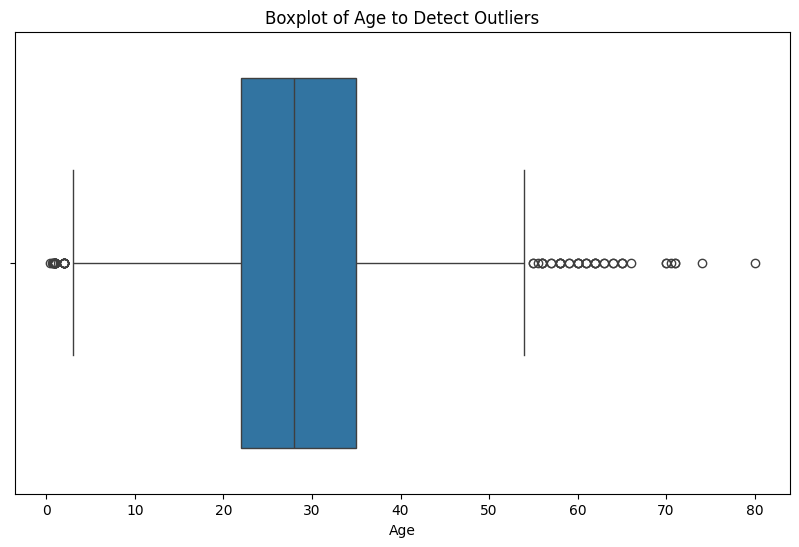

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to visualize outliers in the 'Age' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age to Detect Outliers')
plt.show()

We can also check for any outliers

In [66]:
# Calculate the IQR (Interquartile Range)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for detecting outliers
age_lower_bound = Q1 - 1.5 * IQR
age_upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Age'] < age_lower_bound) | (df['Age'] > age_upper_bound)]
print(f"Number of outliers in Age: {len(outliers)}")

# View the outliers
outliers

Number of outliers in Age: 66


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
7,0,3,1,2.00,3,1,349909,21.0750,S,Master
11,1,1,0,58.00,0,0,113783,26.5500,S,Miss
15,1,2,0,55.00,0,0,248706,16.0000,S,Mrs
16,0,3,1,2.00,4,1,382652,29.1250,Q,Master
33,0,2,1,66.00,0,0,C.A. 24579,10.5000,S,Mr
...,...,...,...,...,...,...,...,...,...,...
827,1,2,1,1.00,0,2,S.C./PARIS 2079,37.0042,C,Master
829,1,1,0,62.00,0,0,113572,80.0000,S,Mrs
831,1,2,1,0.83,1,1,29106,18.7500,S,Master
851,0,3,1,74.00,0,0,347060,7.7750,S,Mr


Even tough we found some outliers, their values are not outside the expected age of human life, and there were no absurd values.

In [68]:
## Bin for age features
df['Age_bin'] = pd.cut(df['Age'], bins=[0,12,20,40,90], labels=['Children','Teenage','Adult','Elder'])
df = pd.get_dummies(df, columns=['Age_bin'], prefix=['Age_type'], drop_first=True)
df.drop('Age', axis=1, inplace=True)


#### Treating 'Sibp' and 'Parch' Columns

Since both columns describe relations between family members, it could  be useful to Cross-Feature them.

NOTE: While Cross-Featuring it, we have to add +1 to the column that represents both of them, as the passenger themselves have to be accounted for to create the new column 'FamilySize'

We could also use binning for the SibSp, since we don't really know if the relashionship between having more family members and survivability are linear or not

In [72]:
# Create a 'FamilySize' feature by adding 'SibSp' and 'Parch'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 to include the passenger

# Create a 'IsAlone' feature
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [73]:
# Drop 'SibSp' and 'Parch' columns
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

# Show head of dataframe
df.head()

,Survived,Pclass,Sex,Ticket,Fare,Embarked,Title,Age_type_Teenage,Age_type_Adult,Age_type_Elder,FamilySize,IsAlone
0,0,3,1,A/5 21171,7.2500,S,Mr,False,True,False,2,0
1,1,1,0,PC 17599,71.2833,C,Mrs,False,True,False,2,0
2,1,3,0,STON/O2. 3101282,7.9250,S,Miss,False,True,False,1,1
3,1,1,0,113803,53.1000,S,Mrs,False,True,False,2,0
4,0,3,1,373450,8.0500,S,Mr,False,True,False,1,1


#### Treating 'Embarked' Column

This column contain different categories displayed as letters.

We can just One-hot encode it to be readable. This, however, generate more columns.

In [76]:
# One-hot encode the 'Embarked' column
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Concatenate the new one-hot encoded columns to the original DataFrame
df = pd.concat([df, embarked_dummies], axis=1)

# Drop the original 'Embarked' column
df.drop('Embarked', axis=1, inplace=True)

# Verify the changes
df.head()

,Survived,Pclass,Sex,Ticket,Fare,Title,Age_type_Teenage,Age_type_Adult,Age_type_Elder,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,A/5 21171,7.2500,Mr,False,True,False,2,0,False,False,True
1,1,1,0,PC 17599,71.2833,Mrs,False,True,False,2,0,True,False,False
2,1,3,0,STON/O2. 3101282,7.9250,Miss,False,True,False,1,1,False,False,True
3,1,1,0,113803,53.1000,Mrs,False,True,False,2,0,False,False,True
4,0,3,1,373450,8.0500,Mr,False,True,False,1,1,False,False,True


#### Treating 'Fare' Column

The 'Fare' column should not contain too many outliers, as it would not represent much of the reality, but surely there could be errors in the data, so we might as well check for outliers the same way as age.

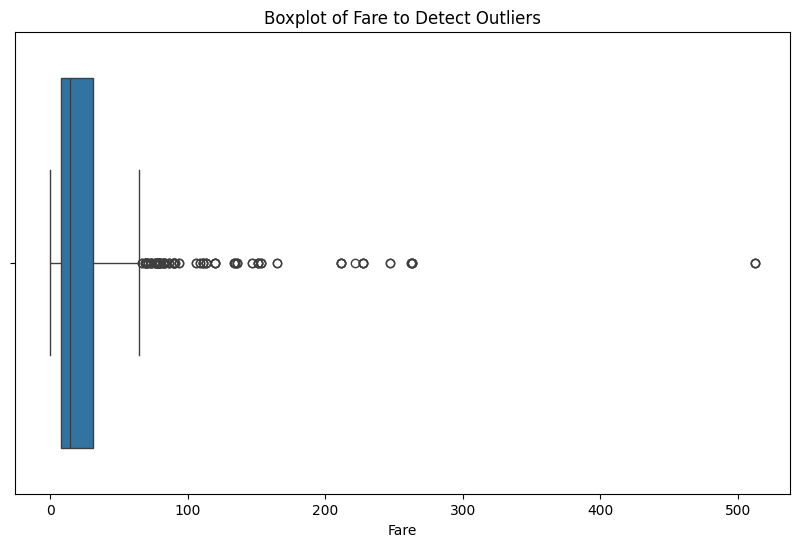

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to visualize outliers in the 'Fare' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare to Detect Outliers')
plt.show()

In [80]:
# Calculate the IQR (Interquartile Range)
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]
print(f"Number of outliers in Fare: {len(outliers)}")

# View the outliers
outliers

Number of outliers in Fare: 116


,Survived,Pclass,Sex,Ticket,Fare,Title,Age_type_Teenage,Age_type_Adult,Age_type_Elder,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
1,1,1,0,PC 17599,71.2833,Mrs,False,True,False,2,0,True,False,False
27,0,1,1,19950,263.0000,Mr,True,False,False,6,0,False,False,True
31,1,1,0,PC 17569,146.5208,Mrs,False,True,False,2,0,True,False,False
34,0,1,1,PC 17604,82.1708,Mr,False,True,False,2,0,True,False,False
52,1,1,0,PC 17572,76.7292,Mrs,False,False,True,2,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,1,CA. 2343,69.5500,Mr,False,True,False,11,0,False,False,True
849,1,1,0,17453,89.1042,Mrs,False,True,False,2,0,True,False,False
856,1,1,0,36928,164.8667,Mrs,False,False,True,3,0,False,False,True
863,0,3,0,CA. 2343,69.5500,Miss,False,True,False,11,0,False,False,True


Observing these values of outliers, we should just clip the value to decrease their difference, before we normalize the values.

The value to be clipped can be around 200, but could also be other values, as it can be seen at the boxplot

In [82]:
# Clip the 'Fare' values to a maximum of 200
df['Fare'] = df['Fare'].clip(upper=200)

In [83]:
print(df['Fare'].median())

14.4542


In [84]:
print(df['Fare'].mean())

30.423993714927047


Any value below around half the median would be considered low (<7.225), and the values between 7.225 and 14.45 correspond to the median bin. 

From 14.45 to 31, the fare would be an average one.

For the last bin, a high fare is between 31 and the last value possible, which is 200.

In [86]:
## Bin for 'Fare' features
df['Fare'] = pd.cut(df['Fare'], bins=[0,7.225,14.45,31,200], labels=['Low_fare','Median_fare','Average_fare','High_fare'])
df = pd.get_dummies(df, columns=['Fare'], prefix=['Fare'], drop_first=True)

In [87]:
df.head()

,Survived,Pclass,Sex,Ticket,Title,Age_type_Teenage,Age_type_Adult,Age_type_Elder,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S,Fare_Median_fare,Fare_Average_fare,Fare_High_fare
0,0,3,1,A/5 21171,Mr,False,True,False,2,0,False,False,True,True,False,False
1,1,1,0,PC 17599,Mrs,False,True,False,2,0,True,False,False,False,False,True
2,1,3,0,STON/O2. 3101282,Miss,False,True,False,1,1,False,False,True,True,False,False
3,1,1,0,113803,Mrs,False,True,False,2,0,False,False,True,False,False,True
4,0,3,1,373450,Mr,False,True,False,1,1,False,False,True,True,False,False


#### Treating 'Ticket' Column

In [89]:
# Drop the original 'Embarked' column
df.drop('Ticket', axis=1, inplace=True)

# Verify the changes
df.head()

,Survived,Pclass,Sex,Title,Age_type_Teenage,Age_type_Adult,Age_type_Elder,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S,Fare_Median_fare,Fare_Average_fare,Fare_High_fare
0,0,3,1,Mr,False,True,False,2,0,False,False,True,True,False,False
1,1,1,0,Mrs,False,True,False,2,0,True,False,False,False,False,True
2,1,3,0,Miss,False,True,False,1,1,False,False,True,True,False,False
3,1,1,0,Mrs,False,True,False,2,0,False,False,True,False,False,True
4,0,3,1,Mr,False,True,False,1,1,False,False,True,True,False,False


#### Treating 'Title' Column

In [91]:
# One-hot encode the 'Title' column
df = pd.get_dummies(df, columns=['Title'], drop_first=True)

# Verify the changes
df.head()

,Survived,Pclass,Sex,Age_type_Teenage,Age_type_Adult,Age_type_Elder,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S,Fare_Median_fare,Fare_Average_fare,Fare_High_fare,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,1,False,True,False,2,0,False,False,True,True,False,False,False,True,False,False
1,1,1,0,False,True,False,2,0,True,False,False,False,False,True,False,False,True,False
2,1,3,0,False,True,False,1,1,False,False,True,True,False,False,True,False,False,False
3,1,1,0,False,True,False,2,0,False,False,True,False,False,True,False,False,True,False
4,0,3,1,False,True,False,1,1,False,False,True,True,False,False,False,True,False,False


## - Training Dataframe:

In [93]:
df.head()

,Survived,Pclass,Sex,Age_type_Teenage,Age_type_Adult,Age_type_Elder,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S,Fare_Median_fare,Fare_Average_fare,Fare_High_fare,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,1,False,True,False,2,0,False,False,True,True,False,False,False,True,False,False
1,1,1,0,False,True,False,2,0,True,False,False,False,False,True,False,False,True,False
2,1,3,0,False,True,False,1,1,False,False,True,True,False,False,True,False,False,False
3,1,1,0,False,True,False,2,0,False,False,True,False,False,True,False,False,True,False
4,0,3,1,False,True,False,1,1,False,False,True,True,False,False,False,True,False,False


In [94]:
print("Total number of NaN values: ",df.isna().sum())

Total number of NaN values:  Survived             0
Pclass               0
Sex                  0
Age_type_Teenage     0
Age_type_Adult       0
Age_type_Elder       0
FamilySize           0
IsAlone              0
Embarked_C           0
Embarked_Q           0
Embarked_S           0
Fare_Median_fare     0
Fare_Average_fare    0
Fare_High_fare       0
Title_Miss           0
Title_Mr             0
Title_Mrs            0
Title_Rare           0
dtype: int64


## 3. Initialize and Treat Test Data
### What will be done here is:
- **Drop the 'PassengerID' Column**: This column is not relevant for the problem.
- **Drop 'Cabin' and 'Ticket' Columns**: We also did this with the training dataframe.
- **Check and treat NaN Values**: NaN values will be treated according to the number of missing values.
- **Same Treatment/Normalization of the Columns**: We need to treat/normalize the columns from the test the same way as the training ones.

In [96]:
test_df = pd.read_csv('test.csv')

In [97]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [98]:
# Drop 'PassengerId' column from the test set
test_df.drop(['PassengerId'], axis=1, inplace=True)

# Drop 'Cabin' column from the test set
test_df.drop(['Cabin'], axis=1, inplace=True)

# Drop 'Ticket' column from the test set
test_df.drop(['Ticket'], axis=1, inplace=True)

In [99]:
# Handle missing values the same way we did with training data
test_df.fillna({'Age': median_age}, inplace=True)
test_df.fillna({'Embarked': most_common_embarked}, inplace=True)

In [100]:
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
    
# Create a new feature Title, containing the titles of passenger names
test_df['Title'] = test_df['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
test_df['Title'] = test_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don','Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_df['Title'] = test_df['Title'].replace('Mlle', 'Miss')
test_df['Title'] = test_df['Title'].replace('Ms', 'Miss')
test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs')

# Drop Name Column
test_df.drop(['Name'], axis=1, inplace=True)

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Azure\AppData\Local\Temp\ipykernel_3396\1712957243.py:3: SyntaxWarning: invalid escape sequence '\.'
  title_search = re.search(' ([A-Za-z]+)\.', name)


In [101]:
# Encode categorical features
test_df['Sex'] = test_df['Sex'].map({'male': 1, 'female': 0})

In [102]:
# Cross-Feature the SibSp and Parch

# Create a 'FamilySize' feature by adding 'SibSp' and 'Parch'
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1  # +1 to include the passenger

# Create a 'IsAlone' feature
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)

# Drop 'SibSp' and 'Parch' columns
test_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

# Show head of dataframe
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,3,1,34.5,7.8292,Q,Mr,1,1
1,3,0,47.0,7.0000,S,Mrs,2,0
2,2,1,62.0,9.6875,Q,Mr,1,1
3,3,1,27.0,8.6625,S,Mr,1,1
4,3,0,22.0,12.2875,S,Mrs,3,0


In [103]:
# One-hot encode the 'Embarked' column
test_embarked_dummies = pd.get_dummies(test_df['Embarked'], prefix='Embarked')

# Concatenate the new one-hot encoded columns to the original DataFrame
test_df = pd.concat([test_df, test_embarked_dummies], axis=1)

# Drop the original 'Embarked' column
test_df.drop('Embarked', axis=1, inplace=True)

# Verify the changes
test_df.head()

,Pclass,Sex,Age,Fare,Title,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,7.8292,Mr,1,1,False,True,False
1,3,0,47.0,7.0000,Mrs,2,0,False,False,True
2,2,1,62.0,9.6875,Mr,1,1,False,True,False
3,3,1,27.0,8.6625,Mr,1,1,False,False,True
4,3,0,22.0,12.2875,Mrs,3,0,False,False,True


In [104]:
# Bin Age and Fare the same way as during training
test_df['Age_bin'] = pd.cut(test_df['Age'], bins=[0,12,20,40,90], labels=['Children','Teenage','Adult','Elder'])
test_df = pd.get_dummies(test_df, columns=['Age_bin'], prefix=['Age_type'], drop_first=True)
test_df.drop('Age', axis=1, inplace=True)

# There is one NaN value in fare, so we have to fill it with the mean
test_df.fillna({'Fare': test_df['Fare'].mean()}, inplace=True)

# We clip the same way as in training
test_df['Fare'] = test_df['Fare'].clip(upper=200)

In [105]:
# Bin for 'Fare' features used in training
test_df['Fare'] = pd.cut(test_df['Fare'], bins=[0,7.225,14.45,31,200], labels=['Low_fare','Median_fare','Average_fare','High_fare'])
test_df = pd.get_dummies(test_df, columns=['Fare'], prefix=['Fare'], drop_first=True)

In [106]:
# Check the processed test data
test_df.head()

,Pclass,Sex,Title,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Fare_Median_fare,Fare_Average_fare,Fare_High_fare
0,3,1,Mr,1,1,False,True,False,False,True,False,True,False,False
1,3,0,Mrs,2,0,False,False,True,False,False,True,False,False,False
2,2,1,Mr,1,1,False,True,False,False,False,True,True,False,False
3,3,1,Mr,1,1,False,False,True,False,True,False,True,False,False
4,3,0,Mrs,3,0,False,False,True,False,True,False,True,False,False


In [107]:
# One-hot encode the 'Title' column
test_df = pd.get_dummies(test_df, columns=['Title'], drop_first=True)

## - Test Dataframe:

In [109]:
test_df.head()

,Pclass,Sex,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Fare_Median_fare,Fare_Average_fare,Fare_High_fare,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,1,1,1,False,True,False,False,True,False,True,False,False,False,True,False,False
1,3,0,2,0,False,False,True,False,False,True,False,False,False,False,False,True,False
2,2,1,1,1,False,True,False,False,False,True,True,False,False,False,True,False,False
3,3,1,1,1,False,False,True,False,True,False,True,False,False,False,True,False,False
4,3,0,3,0,False,False,True,False,True,False,True,False,False,False,False,True,False


In [110]:
print("Total number of NaN values: ",test_df.isna().sum())

Total number of NaN values:  Pclass               0
Sex                  0
FamilySize           0
IsAlone              0
Embarked_C           0
Embarked_Q           0
Embarked_S           0
Age_type_Teenage     0
Age_type_Adult       0
Age_type_Elder       0
Fare_Median_fare     0
Fare_Average_fare    0
Fare_High_fare       0
Title_Miss           0
Title_Mr             0
Title_Mrs            0
Title_Rare           0
dtype: int64


## 4. Visualize Correlation Between Features
We can use Seaborn (sns) to visualize the correlation between features, so we can understand how the data is behaving, and the pairplots.

### Heatmap of Correlation Between Features

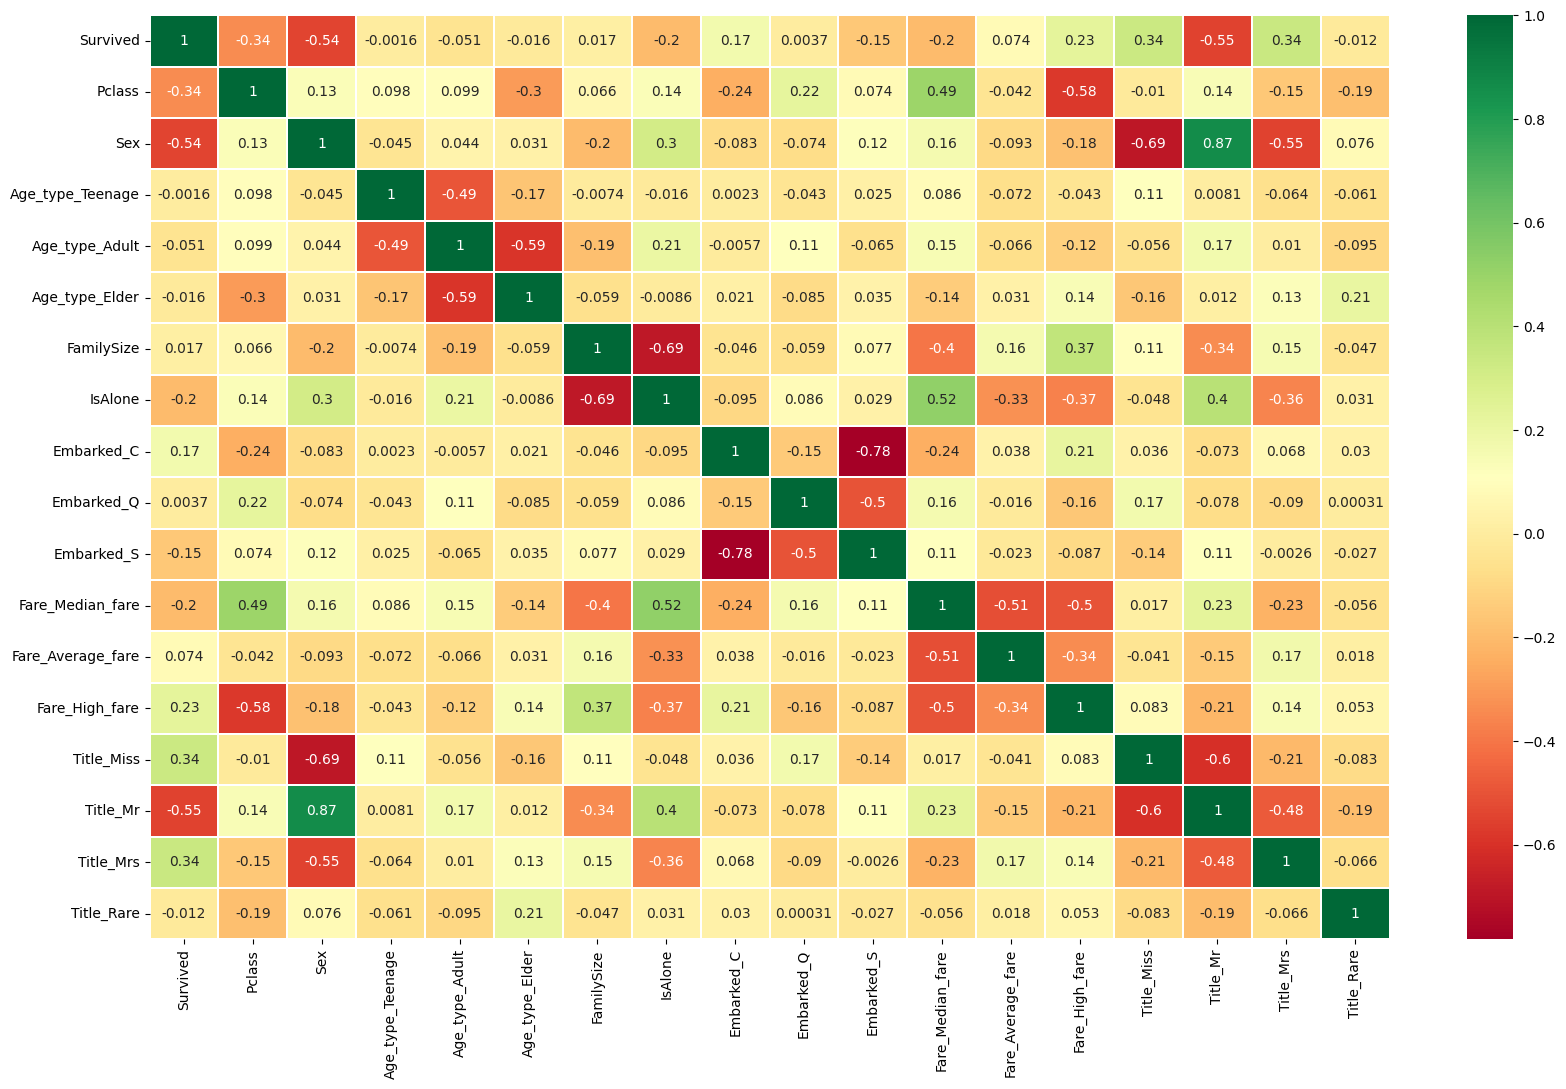

In [113]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

We can see some obvious correlations that we would expect to see, such as the 'Title_Mr' feature being heavily/totally related to the gender of the passenger.

Also, all the one hot encodings appear as 'negative blocks', since all of them exclude one another and should not be related to themselves.

Analysing this further, we could observe which features, if increased, would affect the others. If a feature is completely related another, it is better to just use one of them, as it ends up being redundant.

### Pairplots

In [116]:
#df_pairplot = sns.pairplot(data=df, hue='Survived', palette = 'seismic',
#                 height=1.2,diag_kind = 'kde',diag_kws=dict(fill=True),plot_kws=dict(s=10) )
#df_pairplot.set(xticklabels=[])

It is difficult to read the pair plots of all the modified data, since we transformed it in a way that created many features.

We can still observe, though, the unmodified version of the dataset, as we will be able to read it more easily. We will choose some of the columns for this.

In [118]:
selected_columns = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Survived']

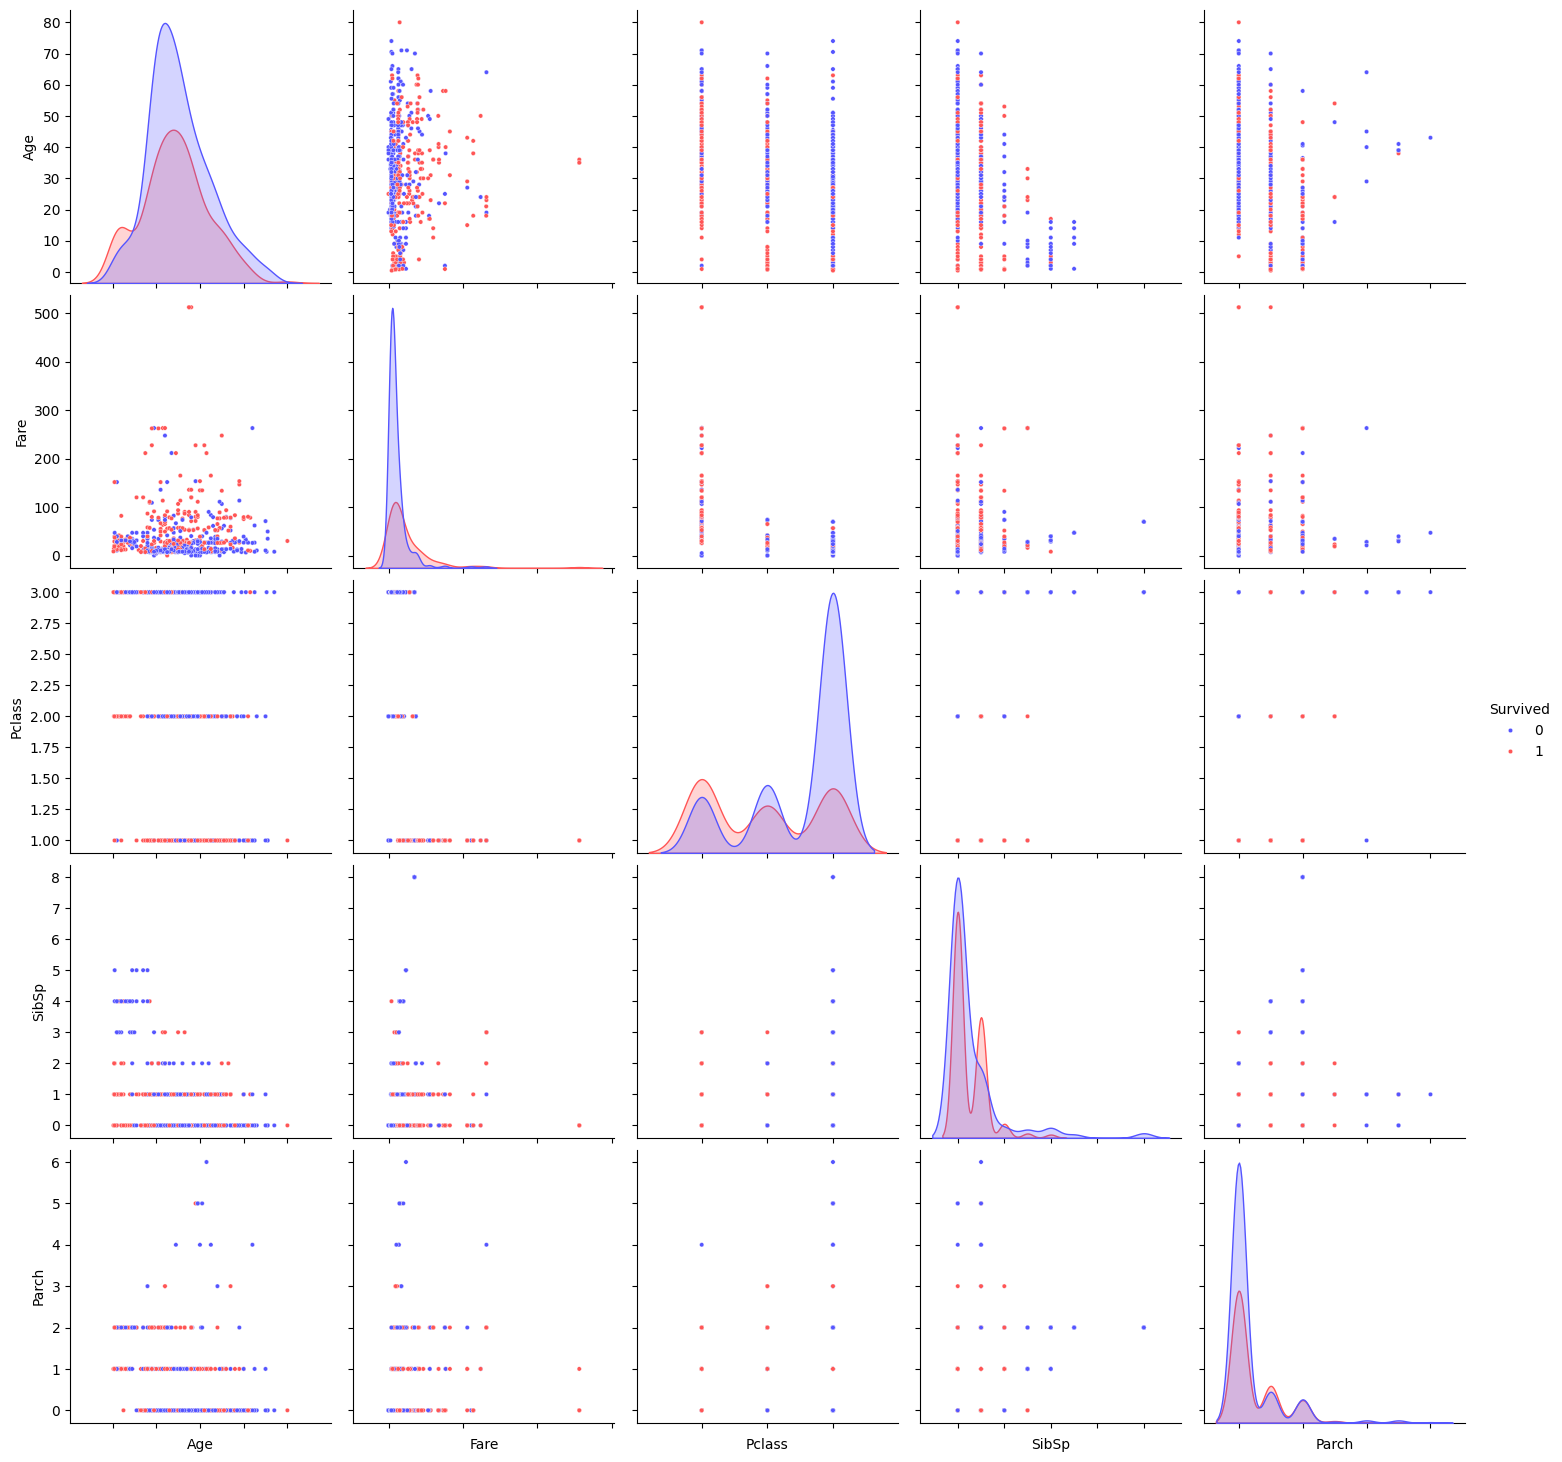

In [119]:
unmodified_df = sns.pairplot(data=unmodified_df[selected_columns], hue='Survived', palette = 'seismic',
                 height=3,diag_kind = 'kde',diag_kws=dict(fill=True),plot_kws=dict(s=10) )
unmodified_df.set(xticklabels=[])

## 5. Train State-of-the-Art Models
### Models that will be used:
1. **Random Forest Classifier**
2. **Decision Tree**
3. **Support Vector Machines**
4. **KNN**
5. **Logistic Regression**
6. **Gaussian Naive Bayes**
7. **Gradient Boosting Classifier**
8. **AdaBoost Classifier**
9. **Linear Discriminant Analysis**
10. **XGBoost Classifier**

### Import models and metrics tools

In [122]:
# ----- Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# -----

from sklearn.model_selection import train_test_split # to split the data
from sklearn.metrics import accuracy_score  # to get accuracy score

from sklearn.model_selection import KFold # to use cross validation in k folds
from sklearn.model_selection import cross_val_score # to get evaluation scores
from sklearn.model_selection import cross_val_predict # to make predictions

from sklearn.metrics import confusion_matrix # to get the confusion matrix

### Prepare Model Data

In [124]:
df_all_features = df.drop("Survived",axis=1)
Targeted_feature = df["Survived"]

In [125]:
X_train,X_test,y_train,y_test = train_test_split(df_all_features,Targeted_feature,test_size=0.3,random_state=1)

In [126]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 17), (268, 17), (623,), (268,))

In [127]:
kfold = KFold(n_splits=10, random_state=1, shuffle=True) # splitting data into 10 folds

### Random Forest Classifier

----------------------------------The Accuracy of the model----------------------------------

The accuracy of the Random Forest Classifier is 77.61

The cross-validated score for Random Forest Classifier on training set is: 85.23 



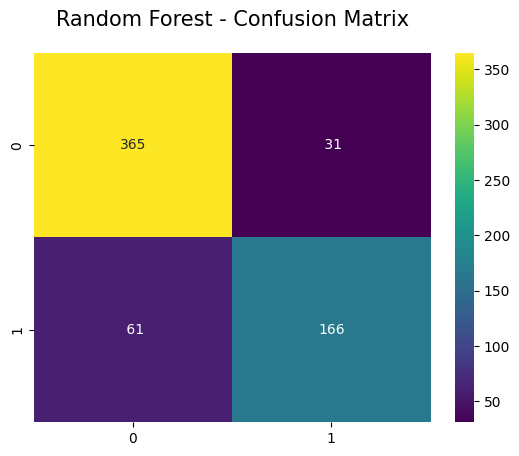

In [129]:
# Initializing Random Forests Model
rf_model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='sqrt',oob_score=True,
                             random_state=1,n_jobs=-1)
# Train model on the training set
rf_model.fit(X_train, y_train)

# Predict on the test set
prediction_rf = rf_model.predict(X_test)

# Calculate and print accuracy on test set
print('----------------------------------The Accuracy of the model----------------------------------')
print('\nThe accuracy of the Random Forest Classifier is', round(accuracy_score(prediction_rf, y_test) * 100, 2))

# Perform cross-validation on the training set
result_rf = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='accuracy')
print('\nThe cross-validated score for Random Forest Classifier on training set is:', round(result_rf.mean() * 100, 2), '\n')

# Cross-validate predictions to build a confusion matrix (based on training set)
y_pred = cross_val_predict(rf_model, X_train, y_train, cv=kfold)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='3.0f', cmap="viridis")
plt.title('Random Forest - Confusion Matrix', y=1.05, size=15)
plt.show()

### Decision Tree

----------------------------------The Accuracy of the model----------------------------------

The accuracy of the Decision Tree Classifier is 76.12

The cross-validated score for Decision Tree Classifier on training set is: 82.51 



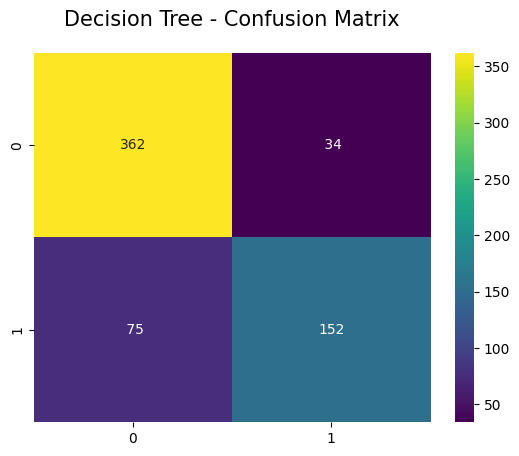

In [131]:
# Initializing Decision Tree Model
dt_model = DecisionTreeClassifier(criterion='gini', min_samples_split=10,
                                  min_samples_leaf=1, max_features='sqrt',
                                  random_state=1)

# Train model on the training set
dt_model.fit(X_train, y_train)

# Predict on the test set
prediction_dt = dt_model.predict(X_test)

# Calculate and print accuracy on test set
print('----------------------------------The Accuracy of the model----------------------------------')
print('\nThe accuracy of the Decision Tree Classifier is', round(accuracy_score(prediction_dt, y_test) * 100, 2))

# Perform cross-validation on the training set
result_dt = cross_val_score(dt_model, X_train, y_train, cv=kfold, scoring='accuracy')
print('\nThe cross-validated score for Decision Tree Classifier on training set is:', round(result_dt.mean() * 100, 2), '\n')

# Cross-validate predictions to build a confusion matrix (based on training set)
y_pred = cross_val_predict(dt_model, X_train, y_train, cv=kfold)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='3.0f', cmap="viridis")
plt.title('Decision Tree - Confusion Matrix', y=1.05, size=15)
plt.show()


### SVM

----------------------------------The Accuracy of the model----------------------------------

The accuracy of the Support Vector Machines Classifier is 79.48

The cross-validated score for Support Vector Machines Classifier on training set is: 84.42 



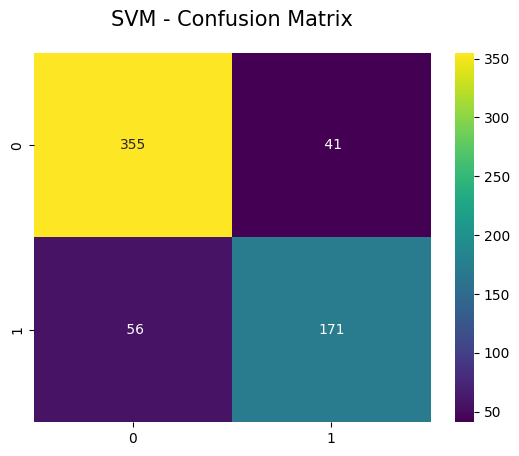

In [133]:
# Initializing SVM Model
svm_model = SVC()

# Train model on the training set
svm_model.fit(X_train, y_train)

# Predict on the test set
prediction_svm = svm_model.predict(X_test)

# Calculate and print accuracy on test set
print('----------------------------------The Accuracy of the model----------------------------------')
print('\nThe accuracy of the Support Vector Machines Classifier is', round(accuracy_score(prediction_svm, y_test) * 100, 2))

# Perform cross-validation on the training set
kfold = KFold(n_splits=10, random_state=1, shuffle=True)  # splitting data into 10 folds
result_svm = cross_val_score(svm_model, X_train, y_train, cv=kfold, scoring='accuracy')
print('\nThe cross-validated score for Support Vector Machines Classifier on training set is:', round(result_svm.mean() * 100, 2), '\n')

# Cross-validate predictions to build a confusion matrix (based on training set)
y_pred = cross_val_predict(svm_model, X_train, y_train, cv=kfold)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='3.0f', cmap="viridis")
plt.title('SVM - Confusion Matrix', y=1.05, size=15)
plt.show()

### KNN

----------------------------------The Accuracy of the model----------------------------------

The accuracy of K Nearest Neighbors Classifier is 79.1

The cross-validated score for K Nearest Neighbors Classifier on training set is: 81.54 



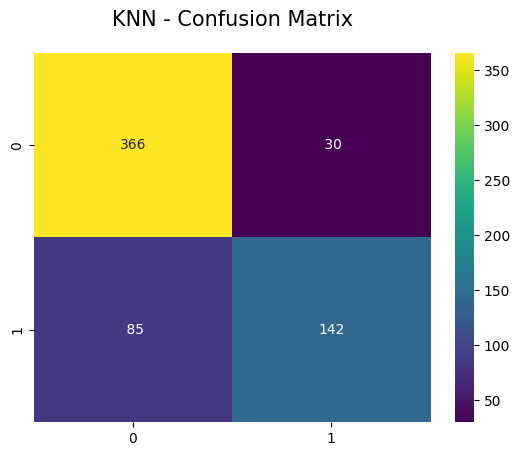

In [135]:
# Initializing KNN Model
knn_model = KNeighborsClassifier(n_neighbors=4)

# Train model on the training set
knn_model.fit(X_train, y_train)

# Predict on the test set
prediction_knn = knn_model.predict(X_test)

# Calculate and print accuracy on test set
print('----------------------------------The Accuracy of the model----------------------------------')
print('\nThe accuracy of K Nearest Neighbors Classifier is', round(accuracy_score(prediction_knn, y_test) * 100, 2))

# Perform cross-validation on the training set
result_knn = cross_val_score(knn_model, X_train, y_train, cv=kfold, scoring='accuracy')
print('\nThe cross-validated score for K Nearest Neighbors Classifier on training set is:', round(result_knn.mean() * 100, 2), '\n')

# Cross-validate predictions to build a confusion matrix (based on training set)
y_pred = cross_val_predict(knn_model, X_train, y_train, cv=kfold)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='3.0f', cmap="viridis")
plt.title('KNN - Confusion Matrix', y=1.05, size=15)
plt.show()


### Logistic Regression

----------------------------------The Accuracy of the model----------------------------------

The accuracy of Logistic Regression Classifier is 79.1

The cross-validated score for Logistic Regression Classifier on training set is: 83.78 



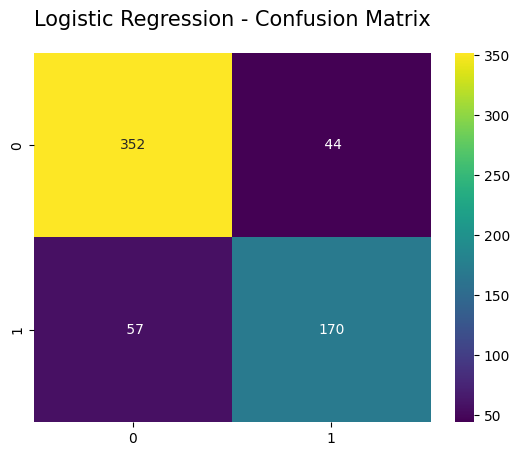

In [137]:
# Initializing Logistic Regression Model
lr_model = LogisticRegression()

# Train model on the training set
lr_model.fit(X_train, y_train)

# Predict on the test set
prediction_lr = lr_model.predict(X_test)

# Calculate and print accuracy on test set
print('----------------------------------The Accuracy of the model----------------------------------')
print('\nThe accuracy of Logistic Regression Classifier is', round(accuracy_score(prediction_lr, y_test) * 100, 2))

# Perform cross-validation on the training set
kfold = KFold(n_splits=10, random_state=1, shuffle=True)  # splitting data into 10 folds
result_lr = cross_val_score(lr_model, X_train, y_train, cv=kfold, scoring='accuracy')
print('\nThe cross-validated score for Logistic Regression Classifier on training set is:', round(result_lr.mean() * 100, 2), '\n')

# Cross-validate predictions to build a confusion matrix (based on training set)
y_pred = cross_val_predict(lr_model, X_train, y_train, cv=kfold)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='3.0f', cmap="viridis")
plt.title('Logistic Regression - Confusion Matrix', y=1.05, size=15)
plt.show()


### Gaussian Naive Bayes

----------------------------------The Accuracy of the model----------------------------------

The accuracy of Gaussian Naive Bayes Classifier is 77.99

The cross-validated score for Gaussian Naive Bayes Classifier on training set is: 79.29 



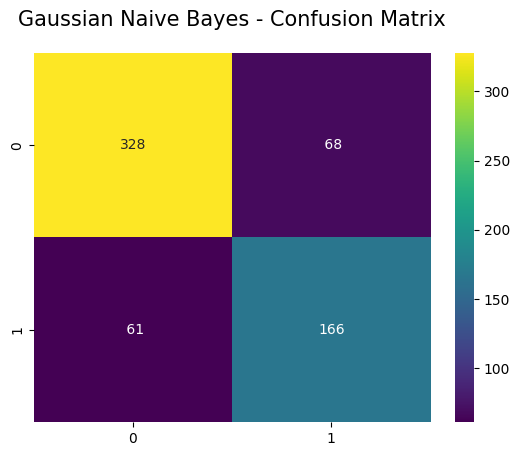

In [139]:
# Initializing Gaussian Naive Bayes Model
gnb_model = GaussianNB()

# Train model on the training set
gnb_model.fit(X_train, y_train)

# Predict on the test set
prediction_gnb = gnb_model.predict(X_test)

# Calculate and print accuracy on test set
print('----------------------------------The Accuracy of the model----------------------------------')
print('\nThe accuracy of Gaussian Naive Bayes Classifier is', round(accuracy_score(prediction_gnb, y_test) * 100, 2))

# Perform cross-validation on the training set
result_gnb = cross_val_score(gnb_model, X_train, y_train, cv=kfold, scoring='accuracy')
print('\nThe cross-validated score for Gaussian Naive Bayes Classifier on training set is:', round(result_gnb.mean() * 100, 2), '\n')

# Cross-validate predictions to build a confusion matrix (based on training set)
y_pred = cross_val_predict(gnb_model, X_train, y_train, cv=kfold)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='3.0f', cmap="viridis")
plt.title('Gaussian Naive Bayes - Confusion Matrix', y=1.05, size=15)
plt.show()

### Gradient Boosting Classifier

----------------------------------The Accuracy of the model----------------------------------

The accuracy of Gradient Boosting Classifier is 78.73

The cross-validated score for Gradient Boosting Classifier on training set is: 83.95 



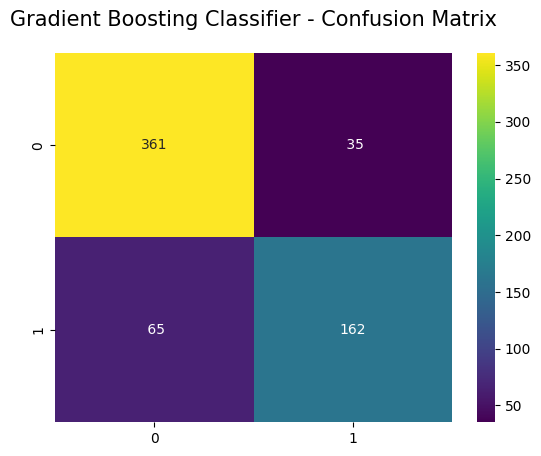

In [141]:
# Initializing Gradient Boosting Classifier Model
gbc_model = GradientBoostingClassifier(n_estimators=300, random_state=1)

# Train model on the training set
gbc_model.fit(X_train, y_train)

# Predict on the test set
prediction_gbc = gbc_model.predict(X_test)

# Calculate and print accuracy on test set
print('----------------------------------The Accuracy of the model----------------------------------')
print('\nThe accuracy of Gradient Boosting Classifier is', round(accuracy_score(prediction_gbc, y_test) * 100, 2))

# Perform cross-validation on the training set
result_gbc = cross_val_score(gbc_model, X_train, y_train, cv=kfold, scoring='accuracy')
print('\nThe cross-validated score for Gradient Boosting Classifier on training set is:', round(result_gbc.mean() * 100, 2), '\n')

# Cross-validate predictions to build a confusion matrix (based on training set)
y_pred = cross_val_predict(gbc_model, X_train, y_train, cv=kfold)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='3.0f', cmap="viridis")
plt.title('Gradient Boosting Classifier - Confusion Matrix', y=1.05, size=15)
plt.show()


### AdaBoost Classifier 

----------------------------------The Accuracy of the model----------------------------------

The accuracy of AdaBoost Classifier is 79.85

The cross-validated score for AdaBoost Classifier on training set is: 83.94 



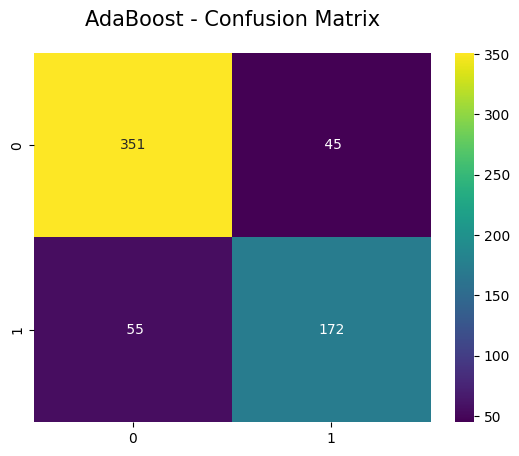

In [143]:
# Initializing AdaBoost Model
ada_model = AdaBoostClassifier(algorithm='SAMME')

# Train model on the training set
ada_model.fit(X_train, y_train)

# Predict on the test set
prediction_ada = ada_model.predict(X_test)

# Calculate and print accuracy on test set
print('----------------------------------The Accuracy of the model----------------------------------')
print('\nThe accuracy of AdaBoost Classifier is', round(accuracy_score(prediction_ada, y_test) * 100, 2))

# Perform cross-validation on the training set
result_ada = cross_val_score(ada_model, X_train, y_train, cv=kfold, scoring='accuracy')
print('\nThe cross-validated score for AdaBoost Classifier on training set is:', round(result_ada.mean() * 100, 2), '\n')

# Cross-validate predictions to build a confusion matrix (based on training set)
y_pred = cross_val_predict(ada_model, X_train, y_train, cv=kfold)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='3.0f', cmap="viridis")
plt.title('AdaBoost - Confusion Matrix', y=1.05, size=15)
plt.show()

### Linear Discriminant Analysis


----------------------------------The Accuracy of the model----------------------------------

The accuracy of Linear Discriminant Analysis is 80.22

The cross-validated score for Linear Discriminant Analysis on training set is: 83.78 



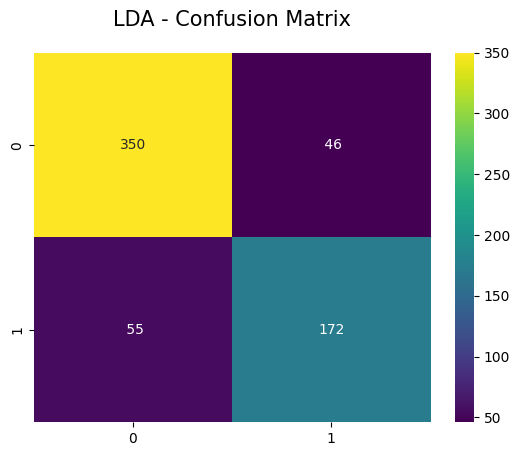

In [145]:
# Initializing LDA Model
lda_model = LinearDiscriminantAnalysis()

# Train model on the training set
lda_model.fit(X_train, y_train)

# Predict on the test set
prediction_lda = lda_model.predict(X_test)

# Calculate and print accuracy on test set
print('----------------------------------The Accuracy of the model----------------------------------')
print('\nThe accuracy of Linear Discriminant Analysis is', round(accuracy_score(prediction_lda, y_test) * 100, 2))

# Perform cross-validation on the training set
kfold = KFold(n_splits=10, random_state=1, shuffle=True)  # splitting data into 10 folds
result_lda = cross_val_score(lda_model, X_train, y_train, cv=kfold, scoring='accuracy')
print('\nThe cross-validated score for Linear Discriminant Analysis on training set is:', round(result_lda.mean() * 100, 2), '\n')

# Cross-validate predictions to build a confusion matrix (based on training set)
y_pred = cross_val_predict(lda_model, X_train, y_train, cv=kfold)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='3.0f', cmap="viridis")
plt.title('LDA - Confusion Matrix', y=1.05, size=15)
plt.show()

### XGBoost Classifier

----------------------------------The Accuracy of the model----------------------------------

The accuracy of XGBoost Classifier is 77.24

The cross-validated score for XGBoost Classifier on training set is: 83.63 



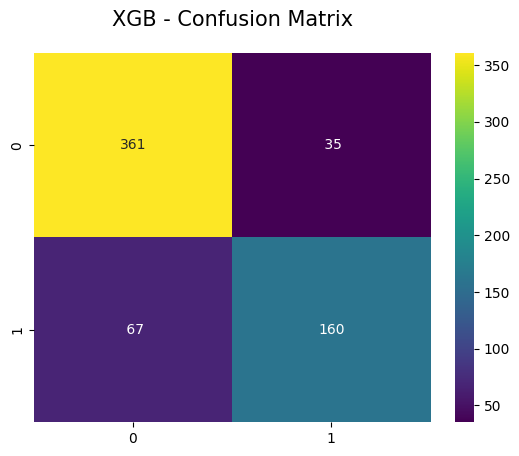

In [147]:
# Initializing XGB Model
xgb_model = XGBClassifier(n_estimators=100, random_state=1)

# Train model on the training set
xgb_model.fit(X_train, y_train)

# Predict on the test set
prediction_xgb = xgb_model.predict(X_test)

# Calculate and print accuracy on test set
print('----------------------------------The Accuracy of the model----------------------------------')
print('\nThe accuracy of XGBoost Classifier is', round(accuracy_score(prediction_xgb, y_test) * 100, 2))

# Perform cross-validation on the training set
kfold = KFold(n_splits=10, random_state=1, shuffle=True)  # splitting data into 10 folds
result_xgb = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring='accuracy')
print('\nThe cross-validated score for XGBoost Classifier on training set is:', round(result_xgb.mean() * 100, 2), '\n')

# Cross-validate predictions to build a confusion matrix (based on training set)
y_pred = cross_val_predict(xgb_model, X_train, y_train, cv=kfold)
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='3.0f', cmap="viridis")
plt.title('XGB - Confusion Matrix', y=1.05, size=15)
plt.show()

## 6. Evaluating Models

In [149]:
models = pd.DataFrame({
    'Model': ['Random Forest Classifier',
                'Decision Tree',
                'Support Vector Machines',
                'KNN',
                'Logistic Regression',
                'Gaussian Naive Bayes',
                'Gradient Boosting Classifier',
                'AdaBoost Classifier',
                'Linear Discriminant Analysis',
                'XGBoost Classifier'],
    'Score': [result_rf.mean(), result_dt.mean(), result_svm.mean(), 
              result_knn.mean(), result_lr.mean(), result_gnb.mean(), 
              result_gbc.mean(), result_ada.mean(), result_lda.mean(), 
              result_xgb.mean()]})

models.sort_values(by='Score',ascending=False)

,Model,Score
0,Random Forest Classifier,0.852253
2,Support Vector Machines,0.844214
6,Gradient Boosting Classifier,0.839452
7,AdaBoost Classifier,0.839375
4,Logistic Regression,0.837814
8,Linear Discriminant Analysis,0.837814
9,XGBoost Classifier,0.836252
1,Decision Tree,0.825141
3,KNN,0.815438
5,Gaussian Naive Bayes,0.792857


As the table shows, the fittest model for the current task (predicting if a passenger of the titanic lived or died) are **Support Vector Machines**, **Logistic Regression**, **Random Forest Classifier**, **Linear Discriminant Analysis**.

We will now refine some of the models, tuning their Hyper-Parameters to improve their performance.

## 7. Tune Models' Hyper-Parameters
### Models that will be tuned:
- **[Support Vector Machines](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)**
- **[Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)**
- **[Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)**
- **[Linear Discriminant Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)**
- **[XGBoost Classifier](https://xgboost.readthedocs.io/en/stable/parameter.html#global-config)**
- **[AdaBoost Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)**

### Tools used:
- **GridSearch**

We will make a very heavy Hyper-Parameter Tuning, using the GridSearch with many different parameters.

### Prepare Data

In [153]:
train_X = df.drop("Survived", axis=1)
train_Y= df["Survived"]
train_X.shape, train_Y.shape

((891, 17), (891,))

In [154]:
# Get the column order from train_X
column_order = train_X.columns

# Rearrange test_df columns to match df
test_df = test_df[column_order]

# Now test_df should have the same column order as df
print(test_df.head())

# Prepare text_X with the same order
test_X  = test_df.copy()

# Print text_X shape
test_X.shape

   Pclass  Sex  Age_type_Teenage  Age_type_Adult  Age_type_Elder  FamilySize  \
0       3    1             False            True           False           1   
1       3    0             False           False            True           2   
2       2    1             False           False            True           1   
3       3    1             False            True           False           1   
4       3    0             False            True           False           3   

   IsAlone  Embarked_C  Embarked_Q  Embarked_S  Fare_Median_fare  \
0        1       False        True       False              True   
1        0       False       False        True             False   
2        1       False        True       False              True   
3        1       False       False        True              True   
4        0       False       False        True              True   

   Fare_Average_fare  Fare_High_fare  Title_Miss  Title_Mr  Title_Mrs  \
0              False           False 

(418, 17)

### Import libraries for Tuning Hyper-Parameters

In [156]:
from sklearn.model_selection import GridSearchCV

### Tune Hyper-Parameters and Plot Feature Importance

#### Support Vector Machines

In [159]:
# Define the model
svc = SVC()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],                # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto'],            # Kernel coefficient
    'degree': [2, 3, 4],                   # Degree for 'poly' kernel
    'shrinking': [True, False],            # Whether to use the shrinking heuristic
    'probability': [True, False],          # Whether to enable probability estimates
    'class_weight': [None, 'balanced'],    # Weights associated with classes
    'tol': [0.001],                        # Tolerance for stopping criterion
    'decision_function_shape': ['ovr', 'ovo'],  # One-vs-rest ('ovr') or one-vs-one ('ovo')
}

# Create the GridSearchCV object
grid_search_svc = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
grid_search_svc.fit(train_X, train_Y)

# Print the best parameters and best score
print("\nBest parameters found:", grid_search_svc.best_params_)
print("\nBest accuracy:", grid_search_svc.best_score_)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits

Best parameters found: {'C': 10, 'class_weight': None, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 'auto', 'kernel': 'poly', 'probability': True, 'shrinking': True, 'tol': 0.001}

Best accuracy: 0.8316427091833531


#### Logistic Regression

In [161]:
# Define the Logistic Regression model
lr = LogisticRegression()

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],                  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Solvers to try
    'penalty': ['l2'],                             # Regularization penalties (L2 is commonly used)
    'max_iter': [100, 200],                        # Maximum number of iterations
    'class_weight': [None, 'balanced'],            # Deal with imbalanced classes
    'tol': [1e-4, 1e-3, 1e-2],                     # Tolerance for stopping criteria
}

# Create the GridSearchCV object
grid_search_lr = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model on training data
grid_search_lr.fit(train_X, train_Y)

# Print the best parameters and best score
print("\nBest parameters found:", grid_search_lr.best_params_)
print("\nBest accuracy:", grid_search_lr.best_score_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits

Best parameters found: {'C': 1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.001}

Best accuracy: 0.826031008725127


#### Random Forest Classifier

In [163]:
# Define the RandomForestClassifier model
rf = RandomForestClassifier(random_state=1)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],                # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],                # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],                # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],                  # Minimum samples in a leaf node
    'max_features': ['sqrt', 'log2'],               # Number of features to consider at each split
    'bootstrap': [True, False],                     # Whether bootstrap samples are used
    'class_weight': [None, 'balanced'],             # Class weight for dealing with imbalanced data
}

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search_rf.fit(train_X, train_Y)

# Print the best parameters and the best score
print("\nBest parameters found:", grid_search_rf.best_params_)
print("\nBest accuracy:", grid_search_rf.best_score_)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits

Best parameters found: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}

Best accuracy: 0.823821480133074


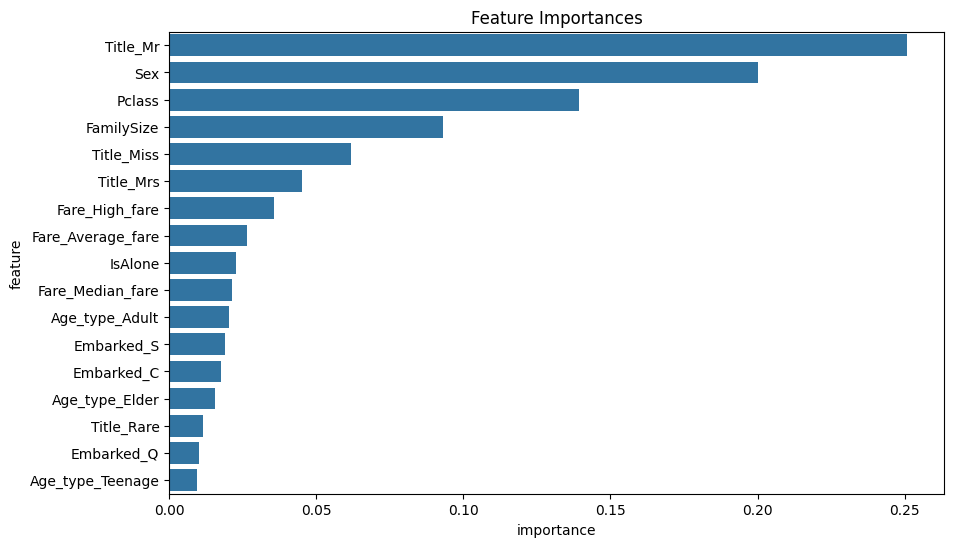

In [164]:
# Define the RandomForestClassifier model again, with the best params
rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=1)

# Fit the model to the training data
rf.fit(train_X, train_Y)

# Get the feature importances
importances = rf.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
feature_importances = pd.DataFrame({
    'feature': train_X.columns,
    'importance': importances
})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot the most important features
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

#### Linear Discriminant Analysis

In [166]:
# Define the LinearDiscriminantAnalysis model
lda = LinearDiscriminantAnalysis()

# Define the parameter grid
param_grid = {
    'solver': ['lsqr'],                           # Solver options
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],   # Only used with 'lsqr' or 'eigen' solver
    'n_components': [None, 1],                    # Number of components for dimensionality reduction
}

# Create the GridSearchCV object
grid_search_lda = GridSearchCV(estimator=lda, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search_lda.fit(train_X, train_Y)

# Print the best parameters and the best score
print("Best parameters found:", grid_search_lda.best_params_)
print("Best accuracy:", grid_search_lda.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'n_components': None, 'shrinkage': None, 'solver': 'lsqr'}
Best accuracy: 0.8282719226664993


In [167]:
# Define the LinearDiscriminantAnalysis model
lda = LinearDiscriminantAnalysis()

# Define the parameter grid
param_grid = {
    'solver': ['svd'],                            # Solver options
    'n_components': [None, 1,],                   # Number of components for dimensionality reduction
    'tol': [0.0001, 0.001, 0.01],                 # Tolerance for rank estimation (only 'svd' solver)
}

# Create the GridSearchCV object
grid_search_lda = GridSearchCV(estimator=lda, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search_lda.fit(train_X, train_Y)

# Print the best parameters and the best score
print("Best parameters found:", grid_search_lda.best_params_)
print("Best accuracy:", grid_search_lda.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found: {'n_components': None, 'solver': 'svd', 'tol': 0.0001}
Best accuracy: 0.8282719226664993


#### XGBoost Classifier

In [169]:
# Define the XGBClassifier model
xgb_model = XGBClassifier(random_state=1)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300],                   # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],            # Learning rate
    'max_depth': [3, 5],                          # Maximum depth of trees
    'min_child_weight': [1, 3, 5],                # Minimum sum of weights in a child
    'subsample': [0.6, 0.8, 1.0],                 # Fraction of samples for trees
    'colsample_bytree': [0.6, 0.8, 1.0],          # Fraction of features used in each tree
    'gamma': [0, 0.1, 0.2],                       # Minimum loss reduction
}

# Create the GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search_xgb.fit(train_X, train_Y)

# Print the best parameters and the best score
print("\nBest parameters found:", grid_search_xgb.best_params_)
print("\nBest accuracy:", grid_search_xgb.best_score_)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits

Best parameters found: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}

Best accuracy: 0.8316238779737619


#### AdaBoost Classifier

In [171]:
# Define the AdaBoost model
ada_model = AdaBoostClassifier(random_state=1)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],                   # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 1.0],                # Learning rate
    'algorithm': ['SAMME'],                           # Boosting algorithm
    'estimator': [DecisionTreeClassifier(max_depth=1),
                       DecisionTreeClassifier(max_depth=3)]  # Weak learner depth
}

# Create the GridSearchCV object
grid_search_ada = GridSearchCV(estimator=ada_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search_ada.fit(train_X, train_Y)

# Print the best parameters and the best score
print("\nBest parameters found:", grid_search_ada.best_params_)
print("\nBest accuracy:", grid_search_ada.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best parameters found: {'algorithm': 'SAMME', 'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.01, 'n_estimators': 50}

Best accuracy: 0.8293766869625259


## Most Accurate Model
After Tuning the Hyper-Paremeters of the chosen models, the best score found was from the **Support Vector Machines (SVM)** model, with **0.831643**.

In [173]:
tuned_models = pd.DataFrame({
    'Model': ['Support Vector Machines',
                'Logistic Regression',
                'Random Forest Classifier',
                'Linear Discriminant Analysis',
                'XGBoost Classifier',
                'AdaBoost Classifier'],
    'Score': [grid_search_svc.best_score_, grid_search_lr.best_score_, grid_search_rf.best_score_, 
              grid_search_lda.best_score_, grid_search_xgb.best_score_, grid_search_ada.best_score_]})

tuned_models.sort_values(by='Score',ascending=False)

,Model,Score
0,Support Vector Machines,0.831643
4,XGBoost Classifier,0.831624
5,AdaBoost Classifier,0.829377
3,Linear Discriminant Analysis,0.828272
1,Logistic Regression,0.826031
2,Random Forest Classifier,0.823821


## 8. Finalizing for file submission: Support Vector Machines (SVM) with the Test.csv data
Ending the exercise, we will just build the last model, which is the most accurate model acquired from the hyper-parameters tuning.
Then, the submission file is built, following the kaggle's dataset instructions for the format.

In [203]:
# Create final SVM model
final_svc = SVC(**grid_search_svc.best_params_, random_state=1)

# Fit the model again, but with it now using the best params found
final_svc.fit(train_X, train_Y)

# Perform cross-validation to get an estimate of the model accuracy
cross_val_accuracy = cross_val_score(final_svc, train_X, train_Y, cv=5, scoring='accuracy')

# Print the average cross-validation accuracy
print(f'Final SVM cross-validation accuracy: {cross_val_accuracy.mean() * 100:.2f}%')

Final SVM cross-validation accuracy: 83.16%


In [204]:
# Predict labels for test.csv
test_predictions = final_svc.predict(test_X)

# Get the test.csv again
test_file_df = pd.read_csv('test.csv')

# Prepare file for submission
submission = pd.DataFrame({
    'PassengerId': test_file_df['PassengerId'],
    'Survived': test_predictions
})

# Printing the amount of columns
print(submission['Survived'].value_counts())

# Save to CSV (without index)
submission.to_csv('titanic_submission.csv', index=False)

print('Submission file "titanic_submission.csv" created successfully.')

Survived
0    257
1    161
Name: count, dtype: int64
Submission file "titanic_submission.csv" created successfully.


In [207]:
# Open and check the first few lines of the file to verify the structure
with open('titanic_submission.csv', 'r') as file:
    print(file.readlines()[:5])  # Print first 5 lines to check the format

['PassengerId,Survived\n', '892,0\n', '893,1\n', '894,0\n', '895,0\n']


In [209]:
print(f'SVM Titanic Model completed. Cross-validation accuracy: {cross_val_accuracy.mean() * 100:.2f}%. Submission file ready.')

SVM Titanic Model completed. Cross-validation accuracy: 83.16%. Submission file ready.
